<a href="https://colab.research.google.com/github/SibasisDash/bts_artifiical_intelligence/blob/master/bts_ai_2019_18_mlp_vs_cnn(MNIST_data)_Sibasis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook created by [Daniel Fojo](https://www.linkedin.com/in/daniel-fojo/) - [UPC School](https://www.talent.upc.edu/ing/estudis/formacio/curs/310400/postgrau-artificial-intelligence-deep-learning/) **2019**

Updates: [Xavier Giro](https://imatge.upc.edu/web/people/xavier-giro) - [Barcelona Technology School](https://barcelonatechnologyschool.com/master/master-in-big-data-solutions/) **2019**

# Image Classification 


----

The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of "solving" MNIST as the "Hello World" of deep learning -- it's what you do to verify that your algorithms are working as expected. As you become a machine learning practitioner, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:


In [0]:
# Set the random seed 123 from numpy
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.seed.html
import numpy as np
np.random.seed(123)

In [2]:
# Print the Keras version
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [4]:
# Load the MNIST dataset from Keras. Store training data in train_images & train_labels, and test data in test_images & test_labels
# https://keras.io/datasets/

from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step



train_images and train_labels form the "training set", the data that the model will learn from. The model will then be tested on the "test set", test_images and test_labels. Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging from 0 to 9. There is a one-to-one correspondence between the images and the labels.

Let's have a look at the training data:

In [5]:
# Check the dimensions of the train_images numpy array
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html

train_images.shape

(60000, 28, 28)

And now let's check the labels:



In [6]:
# Check the dimensions of the train_labels numpy array

train_labels.shape

(60000,)

And now let's look at the kind of images we are dealing with:

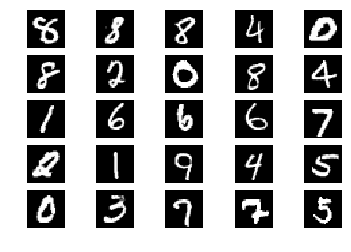

In [7]:
import matplotlib.pyplot as plt
import random

# Definition of a Python function that plots a NxN grid of images contained
# in the images array
def plot_samples(images,N=5):

    '''
    Plots N**2 randomly selected images from training data in a NxN grid
    '''
    
    # Randomly select NxN images and save them in ps
    ps = random.sample(range(0,images.shape[0]), N**2)

    # Allocates figure f divided in subplots contained in an NxN axarr
    # https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.subplots.html
    f, axarr = plt.subplots(N, N)

    # Index for the images in ps to be plotted
    p = 0
    
    # Scan the NxN positions of the grid
    for i in range(N):
        for j in range(N):
          
            # Load the image pointed by p
            im = images[ps[p]]
          
            # If images are encoded in grayscale 
            # (a tensor of 3 dimensions: width x height x luma)...
            if len(images.shape) == 3:
              # ...specify the colormap as grayscale
              # https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html
              axarr[i,j].imshow(im,cmap='gray')            
            else:              
              # ...no need to specify any color map
              axarr[i,j].imshow(im)
              
            # Remove axis
            axarr[i,j].axis('off')
            
            # Point to the next image from the random selection
            p+=1
    # Show the plotted figure         
    plt.show()

# Call of the function defined in the previous lines of code
plot_samples(train_images)

# Training a Multi-Layer Perceptron (MLP)



Our workflow will be as follow: first we will train our neural network with the training data, train_images and train_labels. The network will then learn to associate images and labels. Finally, we will ask the network to produce predictions for test_images, and we will verify if these predictions match the labels from test_labels.

For the time being, we will use a very simple network. It consists of a sequence of two Dense layers, which are densely-connected (also called "fully-connected") neural layers. The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.




In [0]:
from keras import models
from keras import layers

# Define a variable 'network' by instantiating a Keras sequential model
# https://keras.io/getting-started/sequential-model-guide/
network = models.Sequential()

# Add a fully connected layer ('Dense') with 512 neurons with a ReLU activation 
# on top of an input layer with a rolled-out MNIST digit
network.add(layers.Dense(512, activation='relu', input_shape=(784,)))#28X28=784

# Add an output layer with a softmax activation to solve  MNIST classification
network.add(layers.Dense(10, activation='softmax'))

Now we can check which is the architecture of the network, and the number of parameters of each layer:

In [17]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________



To make our network ready for training, we need to pick three more things, as part of "compilation" step:


*    **A loss function**: this is how the network will be able to measure how good a job works on its training data, and thus how it will be able to steer itself in the right direction.
*   **An optimizer**: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
*   ** Metrics to monitor during training and testing**. Here we will only care about accuracy (the fraction of the images that were correctly classified).





In [0]:
# Compile teh defined architecture with the specific optimizer, loss and metric
# https://keras.io/getting-started/sequential-model-guide/

network.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in the [0, 1] interval. Previously, our training images for instance were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. We transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.

In [0]:
# Transform the shape of the train and test images from (N,28,28) to (N,784)
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html
train_images = train_images.reshape(train_images.shape[0],784)
test_images = test_images.reshape(test_images.shape[0],784)

In [0]:
# Transform the data from uint8 data type to float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [0]:
# Transform the range of values between [0,255] to [0,1]
train_images /= 255.0
test_images /= 255.0

The MNIST labels from 0-9 must be encoded as a one hot vector to be predicted by the output neurons of the MLP

In [31]:
# Observe the class encoding provided by default in one sample of the MNIST dataset
train_labels[3]

1

In [0]:
# Use this utility from Keras to convert into a one hot encoding
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
from keras.utils import to_categorical

train_labels = to_categorical(train_labels,dtype='float32')
test_labels = to_categorical(test_labels,dtype='float32')


Is represented by a vector of all 0s and a 1 in the Nth position 

In [33]:
# Observe the class encoding after the transformation

train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

We are now ready to train our network, which in Keras is done via a call to the fit method of the network: we "fit" the model to its training data.

In [34]:
# Train the model during 5 epochs, using a mini-batch size of 128 samples
# https://keras.io/getting-started/sequential-model-guide/
history = network.fit(train_images, train_labels, epochs=5, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.2571 - acc: 0.9250
Epoch 2/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.1047 - acc: 0.9685
Epoch 3/5
60000/60000 [==============================] - 1s 23us/step - loss: 0.0685 - acc: 0.9793
Epoch 4/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.0501 - acc: 0.9854
Epoch 5/5
60000/60000 [==============================] - 1s 23us/step - loss: 0.0375 - acc: 0.9890


Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over the training data.

We quickly reach an accuracy of 0.989 (i.e. 98.9%) on the training data. Now let's check that our model performs well on the test set too:


In [0]:
# Evaluate the model on the test data
# https://keras.io/getting-started/sequential-model-guide/

test_loss, test_acc = network.evaluate(test_images, test_labels, verbose=0)

In [37]:
# Plot the accuracy over the test data
print('test_acc:', test_acc)

test_acc: 0.9803


Our test set accuracy turns out to be around 98% -- that's quite a bit lower than the training set accuracy (take into account that this dataset is really simple - state of the art methods can reach 99.8%). This gap between training accuracy and test accuracy is an example of "overfitting", the fact that machine learning models tend to perform worse on new data than on their training data. Overfitting will be a central topic in the next session.

# Training a Convolutional Neural Network (CNN)

We have trained a network using fully connected layers, but in the lectures we have learned that when dealing with images, Convolutional Neural Networks (CNNs) are more convenient. So, in this second part of the lab, we are going to train a convolutional neural network for multiclass classification. 

The following lines show what a basic convnet looks like. It's a stack of Conv2D and MaxPooling2D layers.  

Importantly, a convnet takes as input tensors of shape (image_height, image_width, image_channels) (not including the batch dimension). In our case, we will configure our convnet to process inputs of size (28, 28, 1), which is the format of MNIST images. We do this via passing the argument input_shape=(28, 28, 1) to our first layer.

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [39]:
# Display the architecture of the defined convnet.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


You can see above that the output of every `Conv2D` and `MaxPooling2D` layer is a 3D tensor of shape `(height, width, channels)`. The width 
and height dimensions are typically designed to shrink as we go deeper in the network. The number of channels is controlled by the first argument passed to 
the `Conv2D` layers (in our case, 32 or 64).

The next step would be to feed our last output tensor (of shape `(3, 3, 64)`) into a densely-connected classifier network like those you are 
already familiar with: a stack of `Dense` layers. These classifiers process vectors, which are 1D, whereas our current output is a 3D tensor. 
So first, we will have to flatten our 3D outputs to 1D, and then add a two `Dense` layers on top to solve MNIST image classification.

In [0]:
# Flatten the last output tensor
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten
model.add(layers.Flatten())

# Add a dense layer with 64 neurons and a ReLU activation
model.add(layers.Dense(64, activation='relu'))

# Add a final layer with a softmax classifier to solve MNIST
model.add(layers.Dense(10, activation='softmax'))

In [41]:
# Show the complete architecture of the CNN
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                36928     
__________

Now, let's train our convnet on the MNIST digits. 

In [0]:
# Re-process data to make this second part self-contained
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
# Compile and train the model, as previously done with the same parameters
# as with the MLP for a fair comparison (same amount of epochs and mini-batch size)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Let's evaluate the model on the test data:

In [46]:
history = model.fit(train_images, train_labels,
                    batch_size=128,
                    epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.2388 - acc: 0.9246
Epoch 2/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.0559 - acc: 0.9828
Epoch 3/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.0377 - acc: 0.9882
Epoch 4/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.0281 - acc: 0.9912
Epoch 5/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.0230 - acc: 0.9931


In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

In [48]:
# Plot the accuracy over the test data
print('test_acc:', test_acc)

test_acc: 0.9907


While our densely-connected network we had a test accuracy of 97.8%, our basic convnet has a test accuracy of 99.0%.